In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import scipy.optimize
import scipy.stats
import scipy.interpolate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn import tree
import copy
import calendar
#import seaborn as sns

import plotting
import dataset_fctns
import modelling_fctns
import seaborn as sns
#from dwd_phenpy import Phenology_set

#import openeo
#import ee
## Trigger the authentication flow.
#ee.Authenticate()#(auth_mode='localhost')
# Initialize the library.
#ee.Initialize(project='ee-martinparker637')

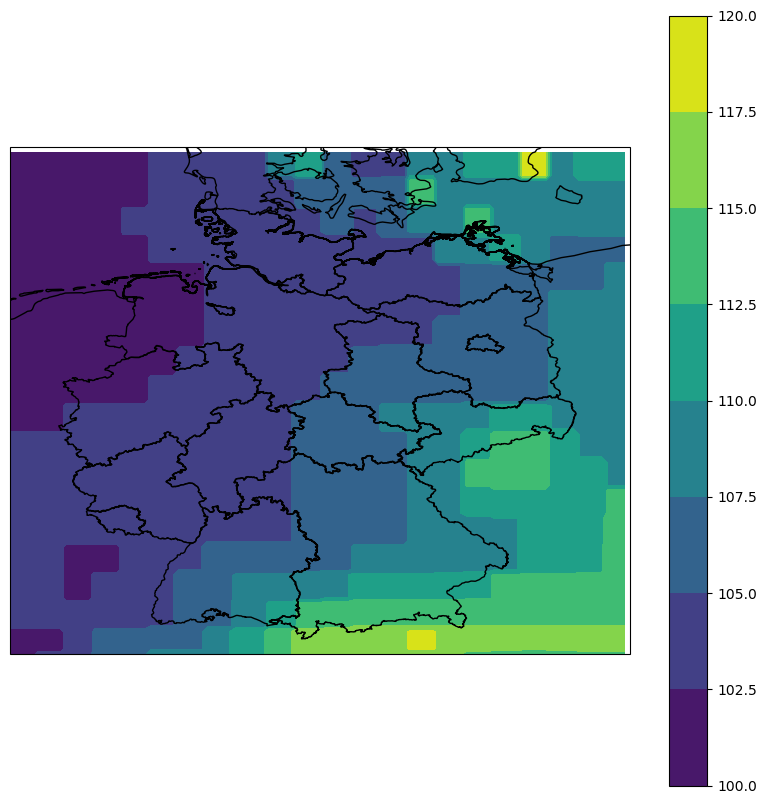

In [25]:
lat = np.arange(47, 56, 0.1)
lon = np.arange(5, 16, 0.1)
LAT, LON = np.meshgrid(lat, lon)
SOS = np.maximum(dataset_fctns.WC_SOS(LON, LAT), 100)

fig, ax = plotting.Germany_plot()
cont = ax.contourf(LON, LAT, SOS, cmap='viridis', vmin  = 100, transform=ccrs.PlateCarree())
plt.colorbar(cont)

In [4]:
hyras_data = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tas_hyras_5_1951_2020_v5-0_de.nc').sel(time=slice('2000-01-01', '2020-12-31'))
hyras_data = hyras_data.drop(['x', 'y']).rename({'x': 'lon', 'y': 'lat'})
hyras_data= hyras_data.drop(['time_bnds', 'x_bnds', 'y_bnds'])
hyras_data= hyras_data.drop(['crs_HYRAS', 'number_of_stations'])
#hyras_data = hyras_data.rename({'y': 'lat', 'x': 'lon'})
ERA5_data = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2011_2024.nc').sel(time=slice('2000-01-01', '2024-12-31'))
ERA5_data = ERA5_data.rename({'latitude': 'lat', 'longitude': 'lon'})

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_16336\1513902282.py:2: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  hyras_data = hyras_data.drop(['x', 'y']).rename({'x': 'lon', 'y': 'lat'})
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_16336\1513902282.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  hyras_data= hyras_data.drop(['time_bnds', 'x_bnds', 'y_bnds'])
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_16336\1513902282.py:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  hyras_data= hyras_data.drop(['crs_HYRAS', 'number_of_stations'])


In [5]:
hyras_lon = hyras_data.lon.values
hyras_lat = hyras_data.lat.values
ERA5_lon = ERA5_data.lon.values
ERA5_lat = ERA5_data.lat.values
#hyras_LON, hyras_LAT = np.meshgrid(hyras_lon, hyras_lat)
ERA5_LON, ERA5_LAT = np.meshgrid(ERA5_lon, ERA5_lat)


In [37]:
ERA5_data['t2m'].max()

<xarray.DataArray 't2m' ()> Size: 8B
array(32.26480103)
Coordinates:
    number   int64 8B ...

In [30]:
ERA5_data['t2m mean'] = ERA5_data.t2m.mean(dim='time')
hyras_data['ERA5 t2m'] = (('time', 'lat', 'lon'), np.zeros(hyras_data.tas.values.shape))
interpolated_temps = []
for year in range(2011, 2024):
    for day in range(366):#366
        date = np.datetime64(f'{year}-01-01') + np.timedelta64(day, 'D')
        print(date)
        ERA5_interpolator = scipy.interpolate.RegularGridInterpolator((ERA5_lat, ERA5_lon), ERA5_data.t2m.sel(time=date).values, method='linear', bounds_error=False, fill_value=None)
        interpolated_temps.append(ERA5_interpolator((hyras_lat, hyras_lon)))

#hyras_data['ERA5 t2m'] = (('time', 'lat', 'lon'), np.array(interpolated_temps))#ERA5_interpolator((hyras_lat, hyras_lon))#hyras_data.assign({'ERA5 t2m':(('lat', 'lon'), ERA5_interpolator((hyras_lat, hyras_lon)))})

2011-01-01
2011-01-02
2011-01-03
2011-01-04
2011-01-05
2011-01-06
2011-01-07
2011-01-08
2011-01-09
2011-01-10
2011-01-11
2011-01-12
2011-01-13
2011-01-14
2011-01-15
2011-01-16
2011-01-17
2011-01-18
2011-01-19
2011-01-20
2011-01-21
2011-01-22
2011-01-23
2011-01-24
2011-01-25
2011-01-26
2011-01-27
2011-01-28
2011-01-29
2011-01-30
2011-01-31
2011-02-01
2011-02-02
2011-02-03
2011-02-04
2011-02-05
2011-02-06
2011-02-07
2011-02-08
2011-02-09
2011-02-10
2011-02-11
2011-02-12
2011-02-13
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
2011-02-19
2011-02-20
2011-02-21
2011-02-22
2011-02-23
2011-02-24
2011-02-25
2011-02-26
2011-02-27
2011-02-28
2011-03-01
2011-03-02
2011-03-03
2011-03-04
2011-03-05
2011-03-06
2011-03-07
2011-03-08
2011-03-09
2011-03-10
2011-03-11
2011-03-12
2011-03-13
2011-03-14
2011-03-15
2011-03-16
2011-03-17
2011-03-18
2011-03-19
2011-03-20
2011-03-21
2011-03-22
2011-03-23
2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01

In [61]:
hyras_data['diff'] = hyras_data.tas - hyras_data['ERA5 t2m']
ERA5_clim = ERA5_data.mean(dim='time')
ERA5_ge_10 = ERA5_clim.where(ERA5_clim.t2m > 10, drop = True)

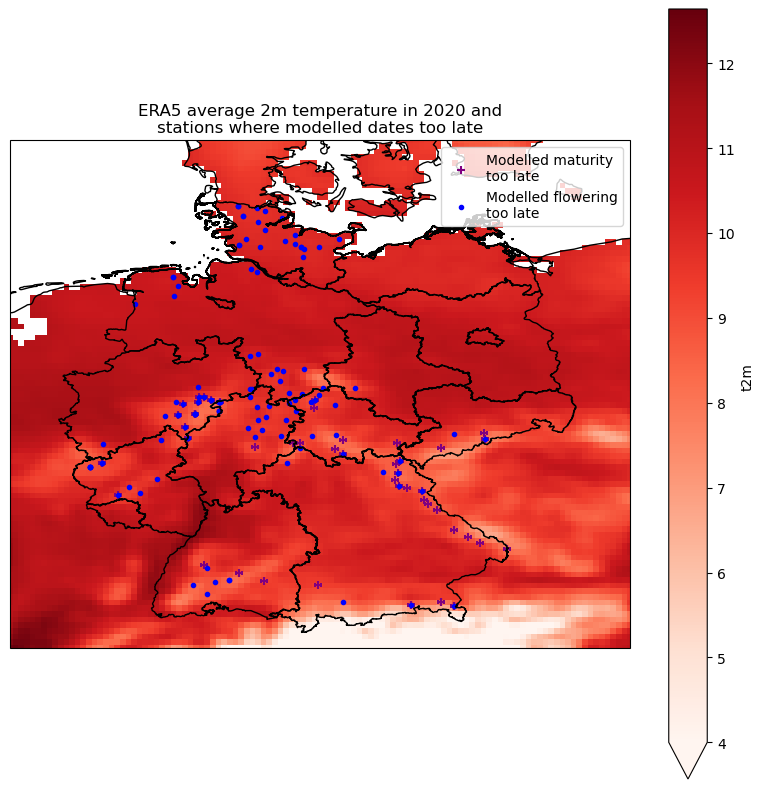

In [6]:
fig, ax = plotting.Germany_plot()
#stat_locs = pd.read_csv('Saved_files/canm_latlon3.csv')
bf_locs = pd.read_csv('Saved_files/cabf_latlon.csv')#3
lm_locs = pd.read_csv('Saved_files/calm_latlon.csv')#3
#for year_index, year in enumerate(stat_locs['Referenzjahr'].unique()):
#    stat_locs_year = stat_locs.where(stat_locs['Referenzjahr'] == year).dropna()
#    ax.scatter(stat_locs_year['lon'], stat_locs_year['lat'], label=year, color = ['r', 'g', 'b', 'k', 'purple', 'orange', 'yellow'][year_index])#, 'ro', transform=ccrs.PlateCarree())
#stat_locs = stat_locs.where(stat_locs['Referenzjahr'] == 2004).dropna()
#, 'ro', transform=ccrs.PlateCarree())
#hyras_data['tas'].mean(dim='time').plot(cmap = 'Reds', ax=ax)#std(dim='time').plot(vmax=1)#.plot(vmin = -1, vmax = 1, cmap = 'coolwarm')#.isel(time=150)vmin = 0, vmax = 20, 
temp_map = ERA5_data['t2m'].mean(dim='time').plot(cmap = 'Reds', ax=ax, vmin = 4)
#temp_map = ERA5_ge_10['t2m'].plot(cmap = 'Reds', ax=ax, vmin = 4)
ax.set_title('ERA5 average 2m temperature in 2020 and\nstations where modelled dates too late')
#plt.colorbar(temp_map, label='Temperature (°C)')
#hyras_data['diff'].mean(dim='time').plot(cmap = 'coolwarm', ax=ax, vmin = -1, vmax = 1)
#ax.scatter(stat_locs['lon'], stat_locs['lat'], color = 'green', marker='x', label='Didn\'t mature')
ax.scatter(lm_locs['lon'], lm_locs['lat'], color = 'purple', marker='+', label='Modelled maturity\ntoo late')
ax.scatter(bf_locs['lon'], bf_locs['lat'], color = 'blue', marker='.', label='Modelled flowering\ntoo late')
ax.legend()

In [65]:
hyras_interpolator = scipy.interpolate.RegularGridInterpolator((hyras_lat, hyras_lon), hyras_data.tas.values, method='linear', bounds_error=False, fill_value=None)

ValueError: The points in dimension 1 must be strictly ascending or descending

In [45]:
ERA5_data.lat.sortby('lat')

<xarray.DataArray 'lat' (lat: 91)> Size: 728B
array([47. , 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1,
       48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3,
       49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50. , 50.1, 50.2, 50.3, 50.4, 50.5,
       50.6, 50.7, 50.8, 50.9, 51. , 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7,
       51.8, 51.9, 52. , 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9,
       53. , 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1,
       54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55. , 55.1, 55.2, 55.3,
       55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56. ])
Coordinates:
    number   int64 8B ...
  * lat      (lat) float64 728B 47.0 47.1 47.2 47.3 47.4 ... 55.7 55.8 55.9 56.0
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing

In [61]:
hyras_data.reindex({'lat':ERA5_data.lat, 'lon':ERA5_data.lon}, method='nearest')

ValueError: cannot reindex or align along dimension 'lat' because of conflicting dimension sizes: {91, 220} (note: an index is found along that dimension with size=91)

In [60]:
hyras_data.interp_like(ERA5_data)#({'lat':ERA5_data.lat.sortby('lat').values, 'lon':ERA5_data.lon.sortby('lon').values},method='nearest')# 'time':np.datetime64('2020-05-19')}, method='nearest')

ValueError: Input DataArray is not 1-D.

In [27]:
hyras_data.reindex(lat=ERA5_data['lat'], lon=ERA5_data['lon'], method='nearest')

<xarray.Dataset> Size: 78MB
Dimensions:             (time: 366, bnds: 2, y: 220, x: 240)
Coordinates:
  * time                (time) datetime64[ns] 3kB 2020-01-01T12:00:00 ... 202...
    lon                 (y, x) float64 422kB ...
    lat                 (y, x) float64 422kB ...
  * x                   (x) float32 960B 3.502e+06 3.508e+06 ... 4.698e+06
  * y                   (y) float32 880B 2.102e+06 2.108e+06 ... 3.198e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 6kB ...
    x_bnds              (x, bnds) float32 2kB ...
    y_bnds              (y, bnds) float32 2kB ...
    crs_HYRAS           int32 4B ...
    tas                 (time, y, x) float32 77MB ...
    number_of_stations  (time) float64 3kB ...
Attributes: (12/19)
    source:                 surface observations
    Conventions:            CF-1.8
    realization:            v5.0
    project_id:             HYRAS
    input_data_status:      non-realtime
    level_type:             surface
    ...                     ...
    horizontal_resolution:  5 km
    title:                  gridded_temperature_dataset_(HYRAS-DE TAS)
    institution:            Deutscher Wetterdienst (DWD)
    creation_date:          created at 2022-12-04 13:12:56
    filename:               tas_hyras_5_1951_2020_v5-0_de.nc
    unique_dataset_id:      DWD_HYRAS_DE_tas_v5.0_1951_2020_day_00638C9CD8

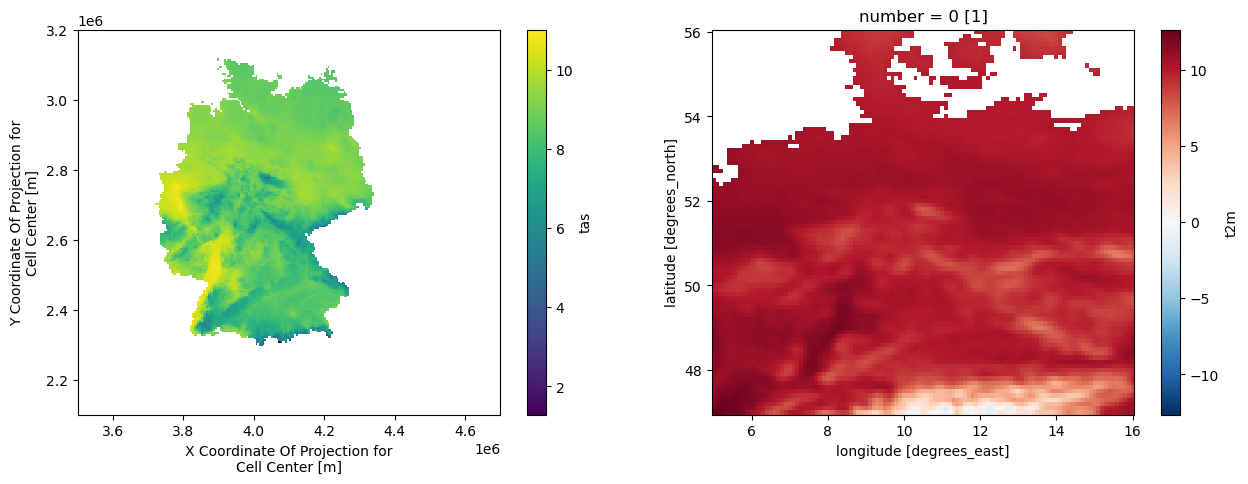

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
hyras_data['tas'].mean(dim='time').plot(ax=axs[0])
ERA5_data['t2m'].mean(dim='time').plot(ax=axs[1])

In [11]:
stat_locs['Referenzjahr'].unique()

array([2004., 2010., 2012., 2015., 2011., 2014., 2007., 2002., 2008.,
       2020., 2016.])

IndexError: list index out of range

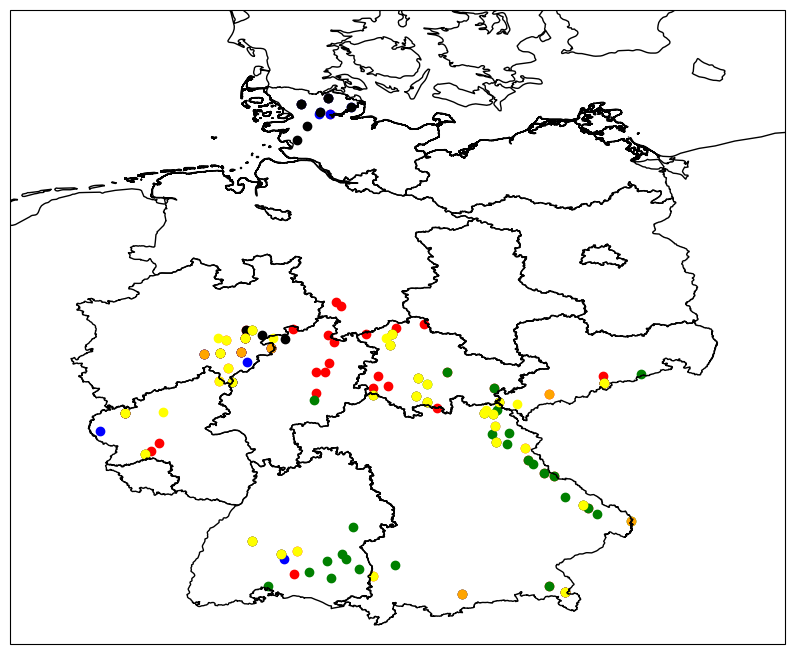

In [15]:
fig, ax = plotting.Germany_plot()
stat_locs = pd.read_csv('Saved_files/canm_latlon.csv')
for year_index, year in enumerate(stat_locs['Referenzjahr'].unique()):
    stat_locs_year = stat_locs.where(stat_locs['Referenzjahr'] == year).dropna()
    ax.scatter(stat_locs_year['lon'], stat_locs_year['lat'], label=year, color = ['r', 'g', 'b', 'k', 'purple', 'orange', 'yellow'][year_index])#, 'ro', transform=ccrs.PlateCarree())
stat_locs = stat_locs.where(stat_locs['Referenzjahr'] == 2004).dropna()
ax.scatter(stat_locs['lon'], stat_locs['lat'])#, 'ro', transform=ccrs.PlateCarree())

In [2]:
for y in range(2010, 2011):
    print(y)

2010


In [16]:
ds = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2020.nc')
#for year in range(2002, 2011):
#    ds = xr.concat([ds, xr.open_dataset(f'C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_{year}.nc')], dim='valid_time')
ds = ds.rename({'valid_time':'time', 'latitude':'lat', 'longitude':'lon'})
ds = ds.sortby('time')

In [17]:
#d2m = ds['d2m'].resample(time="1D").mean()
t2m = ds['t2m'].resample(time="1D").mean()
t2max = ds['t2m'].resample(time="1D").max()

KeyboardInterrupt: 

In [ ]:
#t2max['t2max'] = t2max
#t2max = t2max.drop('t2m')
t2max = t2max.rename('t2max')

In [ ]:
t2min = ds['t2m'].resample(time="1D").min()
#t2min['t2min'] = t2min['t2m']
#t2min = t2min.drop('t2m')
t2min = t2min.rename('t2min')

In [ ]:
ds_for_driver = xr.merge([t2m, t2max, t2min])

In [ ]:
ds_for_driver['t2m'] += -273.15
ds_for_driver['t2max'] += -273.15
ds_for_driver['t2min'] += -273.15

In [9]:
ds_for_driver['Averaging_Discrepancy'] = (ds_for_driver['t2max'] + ds_for_driver['t2min'])/2 - ds_for_driver['t2m']

In [11]:
diffs = ds_for_driver['Averaging_Discrepancy'].mean(dim='time')

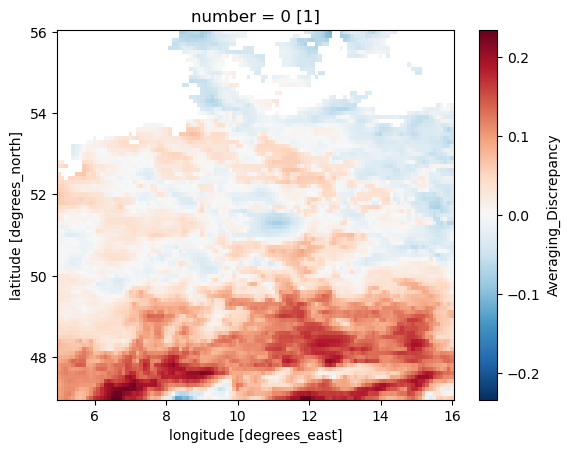

In [12]:
diffs.plot()

In [7]:
ds_for_solrad = ds.where((ds['time.hour'] > 5)*(ds['time.hour'] < 19), drop=True)
ssrd = ds_for_solrad['ssrd'].resample(time="1D").mean()

: 

In [ ]:
tp = ds['tp'].resample(time="1D").sum()

In [ ]:
ds_for_driver = xr.merge([d2m, t2m, ssrd, tp, t2max, t2min])
#ds_for_driver.to_netcdf('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2018_2024.nc')
#ds_for_driver = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2018_2024.nc')
ds_for_driver['t2m'] += -273.15
ds_for_driver['t2max'] += -273.15
ds_for_driver['t2min'] += -273.15
#ds_for_driver.to_netcdf('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land2_2001_2010.nc')
#ds.to_netcdf('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2018_2024.nc')
#ds3 = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2018_2024.nc')

In [16]:
#ds = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2011_2024.nc')
#ds.close()
ds_for_driver.to_netcdf('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2001_2010.nc')
#ds_to_save = xr.concat([ds_for_driver, ds], dim='time')
#ds_to_save

In [3]:
ds1

<xarray.Dataset> Size: 827MB
Dimensions:    (latitude: 91, longitude: 111, time: 5114)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 728B 56.0 55.9 55.8 55.7 ... 47.2 47.1 47.0
  * longitude  (longitude) float64 888B 5.0 5.1 5.2 5.3 ... 15.7 15.8 15.9 16.0
  * time       (time) datetime64[ns] 41kB 2011-01-01 2011-01-02 ... 2024-12-31
Data variables:
    d2m        (time, latitude, longitude) float32 207MB ...
    t2m        (time, latitude, longitude) float32 207MB ...
    ssrd       (time, latitude, longitude) float32 207MB ...
    tp         (time, latitude, longitude) float32 207MB ...
Attributes: (12/32)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      10101
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [13]:
ds1 = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2011_2024.nc')
ds2 = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land_2001_2010.nc')
ds2.close()
ds2 = ds2.where(ds2['time'] < np.datetime64('2011-01-01'), drop = True)
ds2.to_netcdf('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land2_2001_2010.nc')
#ds_to_save = xr.concat([ds1, ds2], dim='time')

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [8]:
np.datetime64('2011-01-01')

numpy.datetime64('2011-01-01')

In [5]:
print(ds1['time'].min().values,
      ds2['time'].max().values)

2011-01-01T00:00:00.000000000 2011-12-31T00:00:00.000000000


In [22]:
ds1

<xarray.Dataset> Size: 827MB
Dimensions:    (latitude: 91, longitude: 111, time: 5114)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 728B 56.0 55.9 55.8 55.7 ... 47.2 47.1 47.0
  * longitude  (longitude) float64 888B 5.0 5.1 5.2 5.3 ... 15.7 15.8 15.9 16.0
  * time       (time) datetime64[ns] 41kB 2011-01-01 2011-01-02 ... 2024-12-31
Data variables:
    d2m        (time, latitude, longitude) float32 207MB ...
    t2m        (time, latitude, longitude) float32 207MB ...
    ssrd       (time, latitude, longitude) float32 207MB ...
    tp         (time, latitude, longitude) float32 207MB ...
Attributes: (12/32)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      10101
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre dewpoint temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0